<a href="https://colab.research.google.com/github/Manas-Singhal/loksabhaelection2024analysis/blob/main/loksabhaelection2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install requests

In [8]:
!pip install requests

In [11]:
!pip install bs4

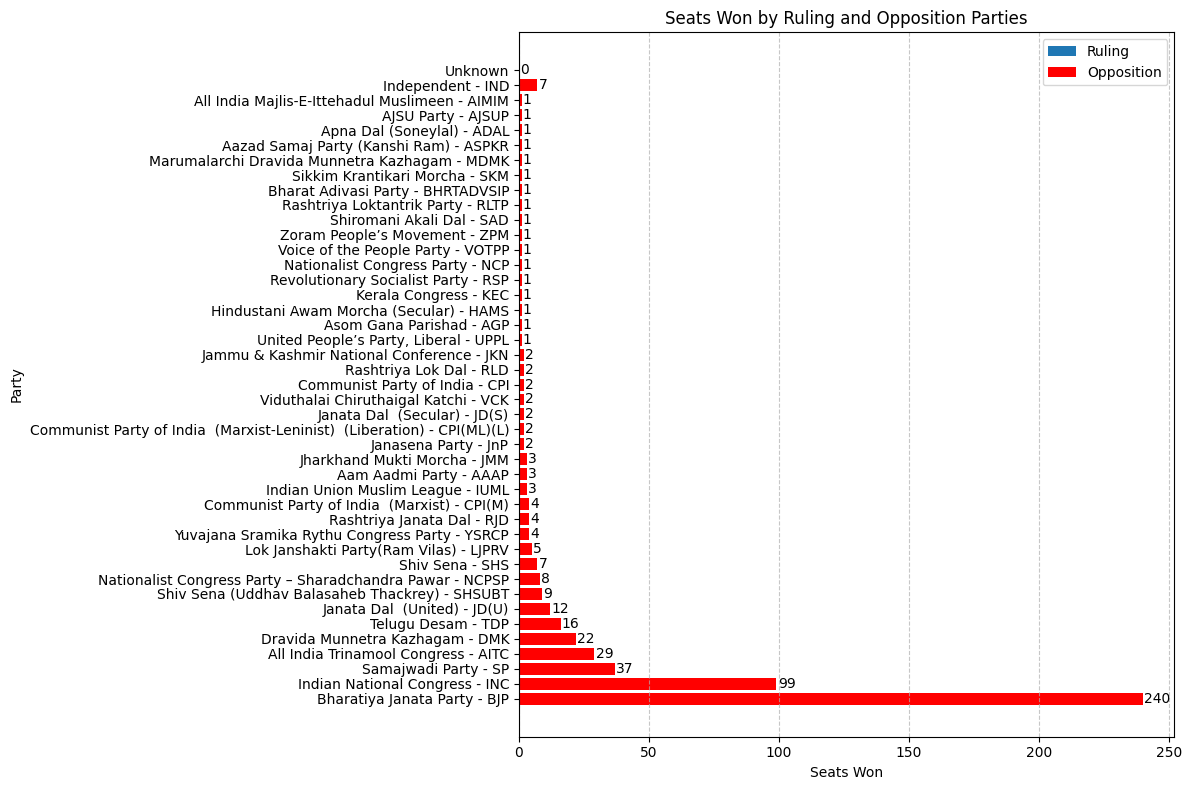

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the webpage
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the table
table = soup.find('table', {'class': 'table'})  # Adjust class name as needed
rows = table.find_all('tr')

# Parsing the table data
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

# Clean up and convert 'Won' column to integers
df['Won'] = df['Won'].replace('', '0').fillna('0')
df['Won'] = df['Won'].str.replace(',', '').astype(int)

# Assign 'Ruling' or 'Opposition' status based on known ruling parties
ruling_parties = ['Party A', 'Party B']  # Adjust with actual ruling party names

# Create 'Status' column
df['Status'] = df['Party'].apply(lambda x: 'Ruling' if x in ruling_parties else 'Opposition')

# Handle None values in 'Party' column for opposition parties
df['Party'] = df['Party'].fillna('Unknown')  # Replace None values with 'Unknown'

# Separate data for ruling and opposition parties
ruling_df = df[df['Status'] == 'Ruling']
opposition_df = df[df['Status'] == 'Opposition']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot ruling parties
ruling_bars = ax.barh(ruling_df['Party'], ruling_df['Won'], color='blue', label='Ruling')

# Plot opposition parties
opposition_bars = ax.barh(opposition_df['Party'], opposition_df['Won'], color='red', label='Opposition')

ax.set_xlabel('Seats Won')
ax.set_ylabel('Party')
ax.set_title('Seats Won by Ruling and Opposition Parties')
ax.legend()

# Adding grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Annotating bars with values
for bar in ruling_bars + opposition_bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
            va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


In [24]:
!pip install requests beautifulsoup4 pandas matplotlib

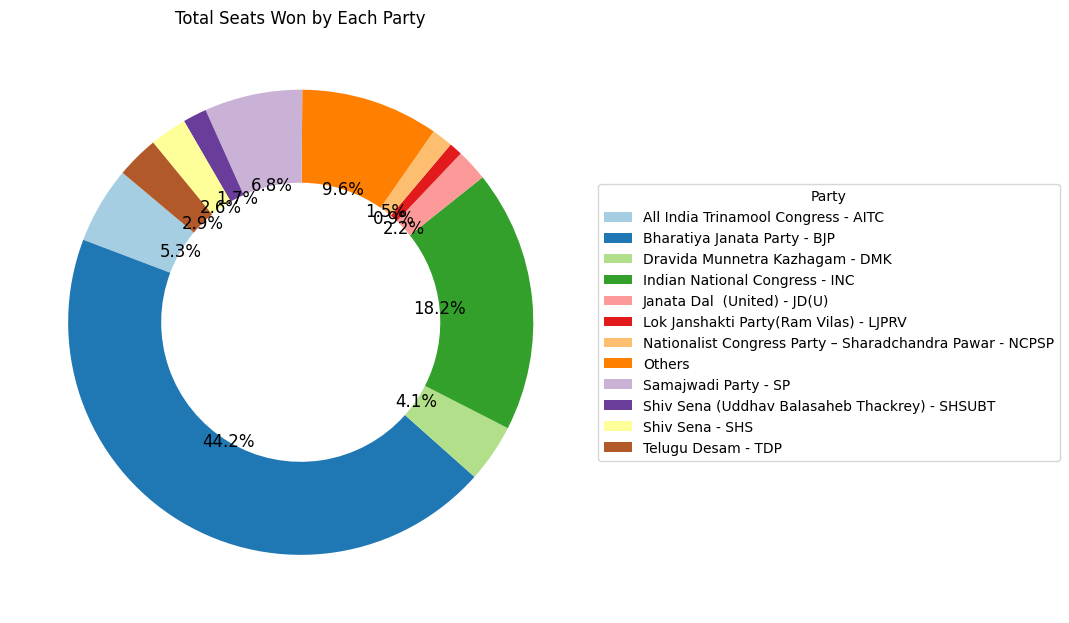

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the webpage
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the table
table = soup.find('table', {'class': 'table'})  # Adjust class name as needed
rows = table.find_all('tr')

# Parsing the table data
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

# Clean up and convert 'Won' column to integers
df['Won'] = df['Won'].replace('', '0').fillna('0')
df['Won'] = df['Won'].str.replace(',', '').astype(int)

# Aggregating small parties into 'Others'
threshold = 5  # Define a threshold for small parties
df['Category'] = df['Won'].apply(lambda x: 'Others' if x < threshold else x)

# Grouping the data
grouped_data = df.groupby('Category')['Won'].sum().reset_index()
grouped_data['Category'] = grouped_data['Category'].apply(lambda x: 'Others' if x == 'Others' else df[df['Won'] == x]['Party'].values[0])

# Aggregating seats
total_seats = grouped_data.groupby('Category')['Won'].sum()

# Pie chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Paired(range(len(total_seats)))
wedges, texts, autotexts = ax.pie(
    total_seats,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# Improve the readability of the pie chart
ax.set_ylabel('')
ax.set_title('Total Seats Won by Each Party')
ax.legend(wedges, total_seats.index, title='Party', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Annotate wedges
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()


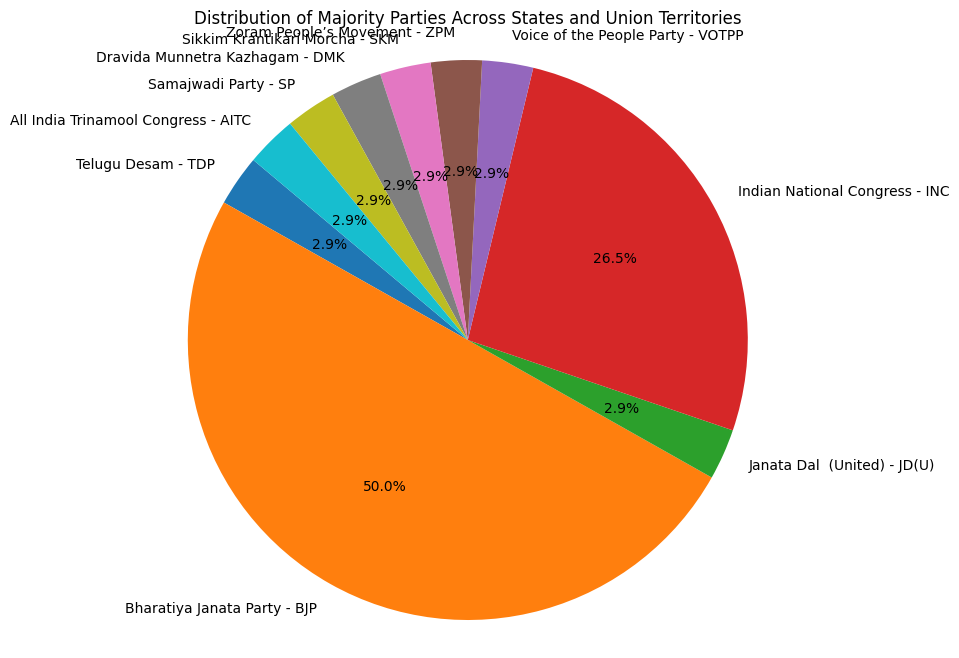

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(party_counts.values(), labels=party_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Majority Parties Across States and Union Territories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [52]:
from google.colab import files
uploaded = files.upload()

Saving lok_sabha_election_results_2024.csv to lok_sabha_election_results_2024.csv


Index(['Constituency', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin'],
      dtype='object')


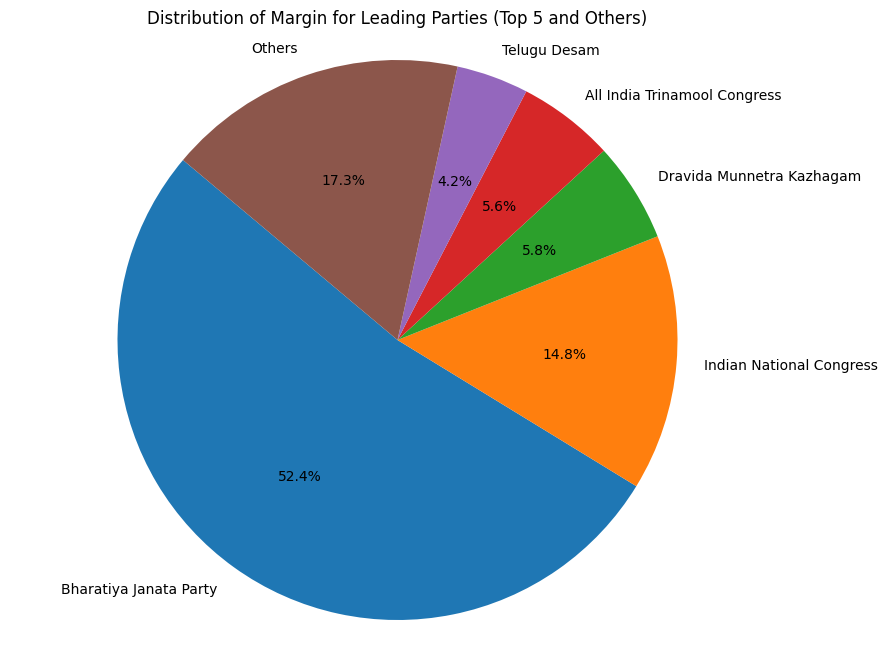

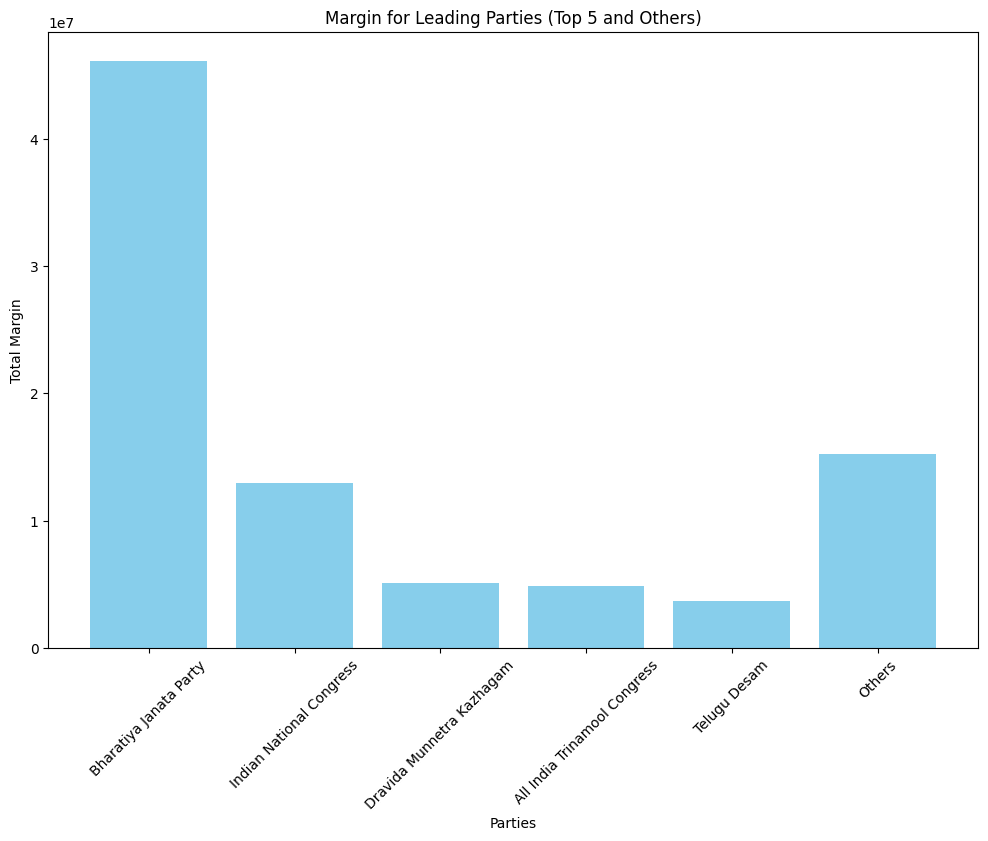

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Print the column names to verify
print(df.columns)

# Clean the 'Margin' column by removing non-numeric characters
df['Margin'] = df['Margin'].str.replace('[^\d]', '', regex=True)

# Convert 'Margin' column to numeric, forcing errors to NaN
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows with NaN values in 'Margin'
df = df.dropna(subset=['Margin'])

# Group by 'Leading Party' and sum the 'Margin'
party_margin = df.groupby('Leading Party')['Margin'].sum().reset_index()

# Sort the data to get the top parties
party_margin = party_margin.sort_values(by='Margin', ascending=False)

# Identify the top five parties
top_five_parties = party_margin.head(5)

# Sum the margins for the remaining parties
others_margin = party_margin[5:]['Margin'].sum()

# Create a new DataFrame for the top five parties and 'Others'
others_df = pd.DataFrame({'Leading Party': ['Others'], 'Margin': [others_margin]})
top_five_and_others = pd.concat([top_five_parties, others_df], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_five_and_others['Margin'], labels=top_five_and_others['Leading Party'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Margin for Leading Parties (Top 5 and Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_five_and_others['Leading Party'], top_five_and_others['Margin'], color='skyblue')
plt.xlabel('Parties')
plt.ylabel('Total Margin')
plt.title('Margin for Leading Parties (Top 5 and Others)')
plt.xticks(rotation=45)
plt.show()


In [62]:
from google.colab import files
uploaded = files.upload()

Saving final_election_result_data.csv to final_election_result_data.csv


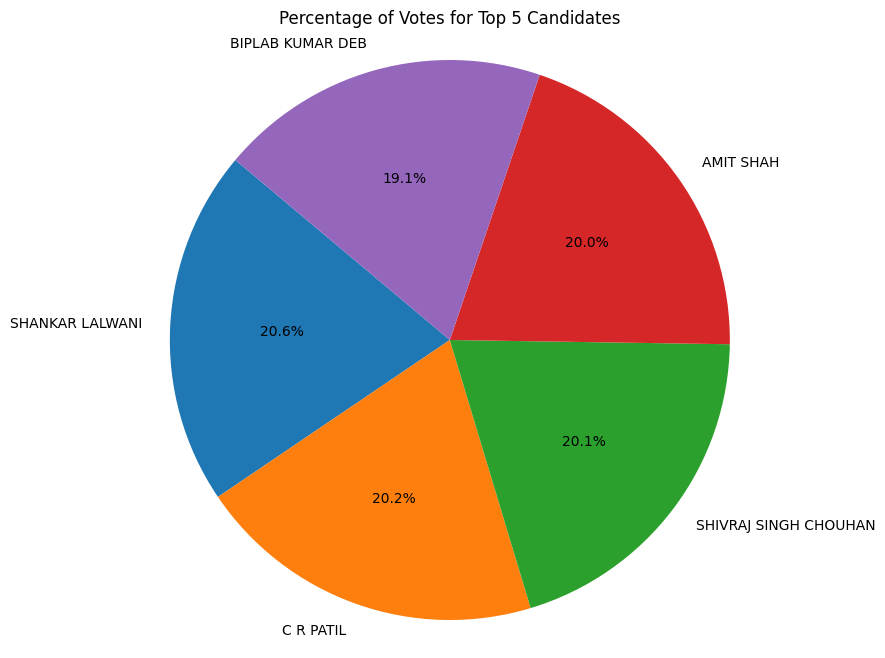

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Ensure the necessary columns are present and convert them to numeric types
df['Total Votes'] = df['Total Votes'].str.replace(',', '').str.replace('-', '0').astype(int)  # Handling hyphens and commas
df['Percent Votes'] = df['Percent Votes'].str.replace(',', '').str.replace('-', '0').astype(float)  # Handling hyphens and commas

# Sort by percentage of votes
df = df.sort_values(by='Percent Votes', ascending=False)

# Select the top 5 candidates by percentage of votes
top_candidates = df.head(5)

# Plotting the pie chart for top 5 candidates
plt.figure(figsize=(10, 8))
plt.pie(top_candidates['Percent Votes'], labels=top_candidates['Candidate Name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Votes for Top 5 Candidates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


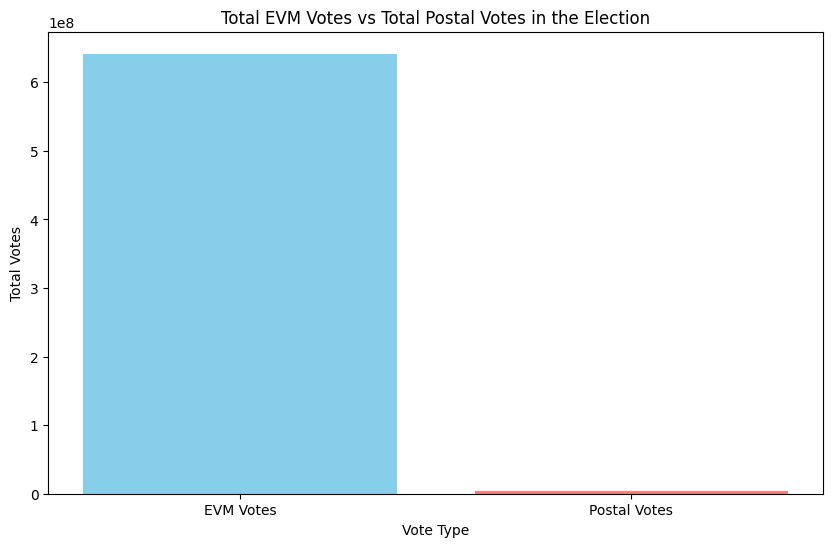

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Ensure the necessary columns are present and convert them to numeric types
df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').str.replace('-', '0').astype(int)  # Handling hyphens and commas
df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').str.replace('-', '0').astype(int)  # Handling hyphens and commas

# Calculate total EVM and Postal votes
total_evm_votes = df['EVM Votes'].sum()
total_postal_votes = df['Postal Votes'].sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(['EVM Votes', 'Postal Votes'], [total_evm_votes, total_postal_votes], color=['skyblue', 'salmon'])
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.title('Total EVM Votes vs Total Postal Votes in the Election')
plt.show()


Seats won by each ruling party:
Bharatiya Janata Party - BJP : 240
Telugu Desam - TDP : 16
Janata Dal  (United) - JD(U) : 12
Shiv Sena - SHS : 7
Lok Janshakti Party(Ram Vilas) - LJPRV : 5
Janasena Party - JnP : 2
Janata Dal  (Secular) - JD(S) : 2
Rashtriya Lok Dal - RLD : 2
United People’s Party, Liberal - UPPL : 1
Asom Gana Parishad - AGP : 1
Hindustani Awam Morcha (Secular) - HAMS : 1
Nationalist Congress Party - NCP : 1
Shiromani Akali Dal - SAD : 1
Sikkim Krantikari Morcha - SKM : 1
Apna Dal (Soneylal) - ADAL : 1


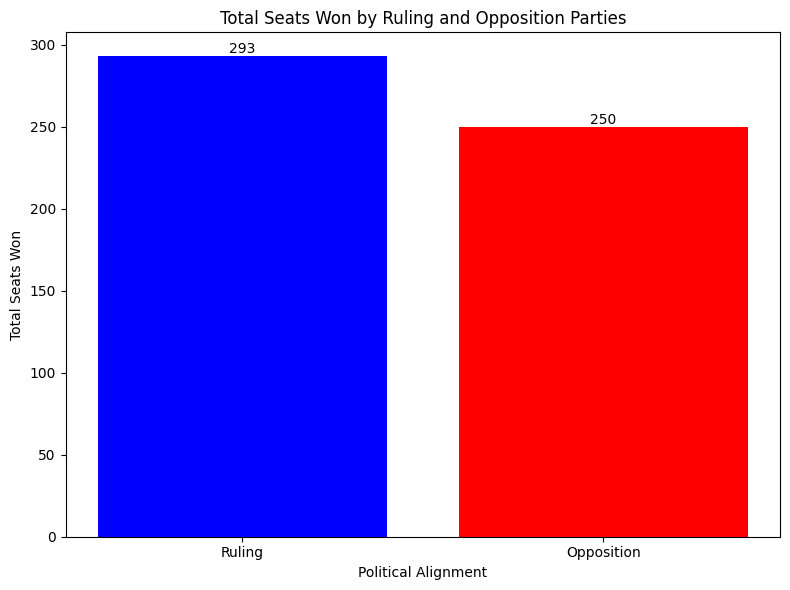

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the table
table = soup.find('table', {'class': 'table'})  # Adjust class name as needed
rows = table.find_all('tr')

data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Create DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

# Clean up and convert 'Won' column to integers
df['Won'] = df['Won'].replace('', '0').fillna('0')
df['Won'] = df['Won'].str.replace(',', '').astype(int)

# Assign 'Ruling' or 'Opposition' status based on known ruling parties
ruling_parties = ['Bharatiya Janata Party - BJP', 'Shiv Sena - SHS', 'Telugu Desam - TDP', 'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Shiromani Akali Dal - SAD', 'Apna Dal (Soneylal) - ADAL', 'Nationalist Congress Party - NCP', 'Apna Dal (Soneylal) - ADAL', 'Janata Dal  (United) - JD(U)', 'Janata Dal  (Secular) - JD(S)', 'Asom Gana Parishad - AGP', 'Janasena Party - JnP', 'Rashtriya Lok Dal - RLD', 'Hindustani Awam Morcha (Secular) - HAMS', 'Sikkim Krantikari Morcha - SKM', 'United People’s Party, Liberal - UPPL']  # Adjust with actual ruling party names

# Create 'Status' column
df['Status'] = df['Party'].apply(lambda x: 'Ruling' if x in ruling_parties else 'Opposition')

# Filter for ruling parties and print their seats separately
ruling_df = df[df['Status'] == 'Ruling']
print("Seats won by each ruling party:")
for index, row in ruling_df.iterrows():
    print(row['Party'], ":", row['Won'])

# Calculate total seats won by ruling and opposition parties
total_ruling_seats = ruling_df['Won'].sum()
total_opposition_seats = df[df['Status'] == 'Opposition']['Won'].sum()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the total seats won
bars = ax.bar(['Ruling', 'Opposition'], [total_ruling_seats, total_opposition_seats], color=['blue', 'red'])

ax.set_xlabel('Political Alignment')
ax.set_ylabel('Total Seats Won')
ax.set_title('Total Seats Won by Ruling and Opposition Parties')

# Add exact count on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Scraped Data (State, Majority Party): [('Andhra Pradesh', 'Telugu Desam - TDP'), ('Arunachal Pradesh', 'Bharatiya Janata Party - BJP'), ('Assam', 'Bharatiya Janata Party - BJP'), ('Bihar', 'Janata Dal  (United) - JD(U)'), ('Goa', 'Bharatiya Janata Party - BJP'), ('Gujarat', 'Bharatiya Janata Party - BJP'), ('Haryana', 'Indian National Congress - INC'), ('Himachal Pradesh', 'Bharatiya Janata Party - BJP'), ('Karnataka', 'Bharatiya Janata Party - BJP'), ('Kerala', 'Indian National Congress - INC'), ('Madhya Pradesh', 'Bharatiya Janata Party - BJP'), ('Maharashtra', 'Indian National Congress - INC'), ('Manipur', 'Indian National Congress - INC'), ('Meghalaya', 'Voice of the People Party - VOTPP'), ('Mizoram', 'Zoram People’s Movement - ZPM'), ('Nagaland', 'Indian National Congress - INC'), ('Odisha', 'Bharatiya Janata Party - BJP'), ('Punjab', 'Indian National Congress - INC'), ('Rajasthan', 'Bharatiya Janata Party - BJP'), ('Sikkim', 'Sikkim Krantikari Morcha - SKM'), ('Tamil Nadu', 'Dra

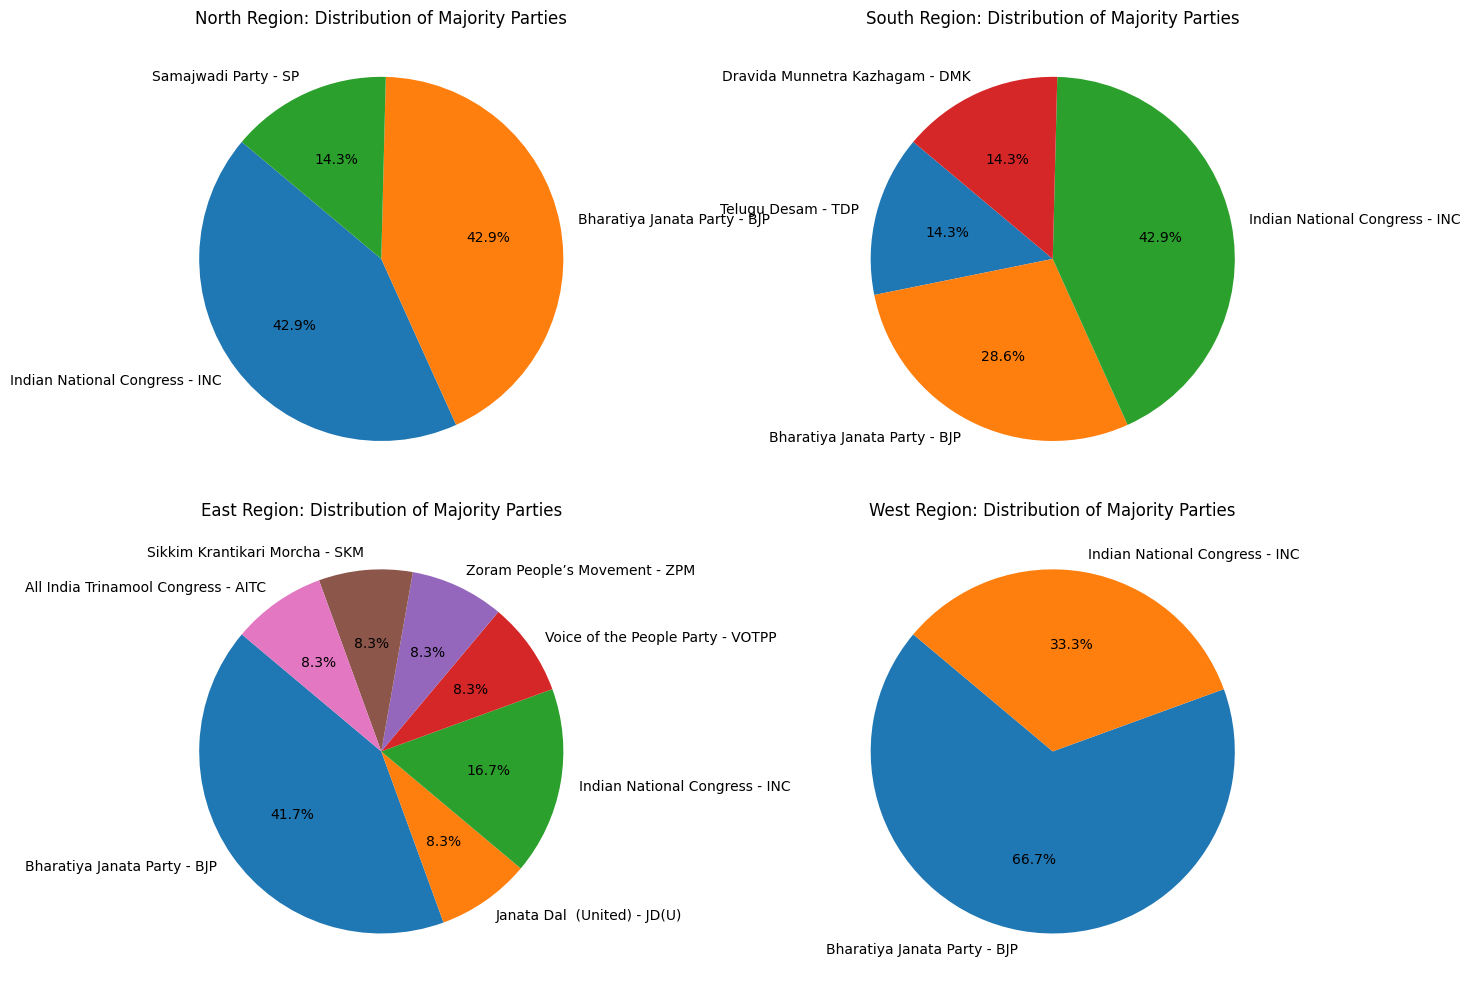

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find('table', class_='table')
        if table is None:
            print(f"No table found for URL: {entity_url}")
            return None, None

        rows = table.find_all('tr')
        data = []
        for row in rows[1:]:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()
        state_name = state_name.split(" (")[0]  # Clean the state name
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error processing {entity_url}: {e}")
        return None, None

regions = {
    'North': ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh', 'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh'],
    'South': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Puducherry', 'Lakshadweep'],
    'East': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
    'West': ['Goa', 'Gujarat', 'Maharashtra', 'Dadra and Nagar Haveli and Daman and Diu']
}

base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]

state_majority_parties = []

for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name and majority_party:
        state_majority_parties.append((state_name, majority_party))

for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name and majority_party:
        state_majority_parties.append((state_name, majority_party))

print("Scraped Data (State, Majority Party):", state_majority_parties)

region_majority_parties = {'North': [], 'South': [], 'East': [], 'West': []}
for state, party in state_majority_parties:
    for region, states in regions.items():
        if state in states:
            region_majority_parties[region].append(party)
            break

region_party_counts = {region: {} for region in region_majority_parties}
for region, parties in region_majority_parties.items():
    for party in parties:
        if party in region_party_counts[region]:
            region_party_counts[region][party] += 1
        else:
            region_party_counts[region][party] = 1

print("Region-wise Party Counts:", region_party_counts)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
regions_list = list(region_party_counts.keys())

for i, region in enumerate(regions_list):
    ax = axs[i // 2, i % 2]
    ax.pie(region_party_counts[region].values(), labels=region_party_counts[region].keys(), autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{region} Region: Distribution of Majority Parties')

plt.tight_layout()
plt.show()

In [8]:
from google.colab import files
uploaded = files.upload()

Saving final_election_result_data.csv to final_election_result_data.csv


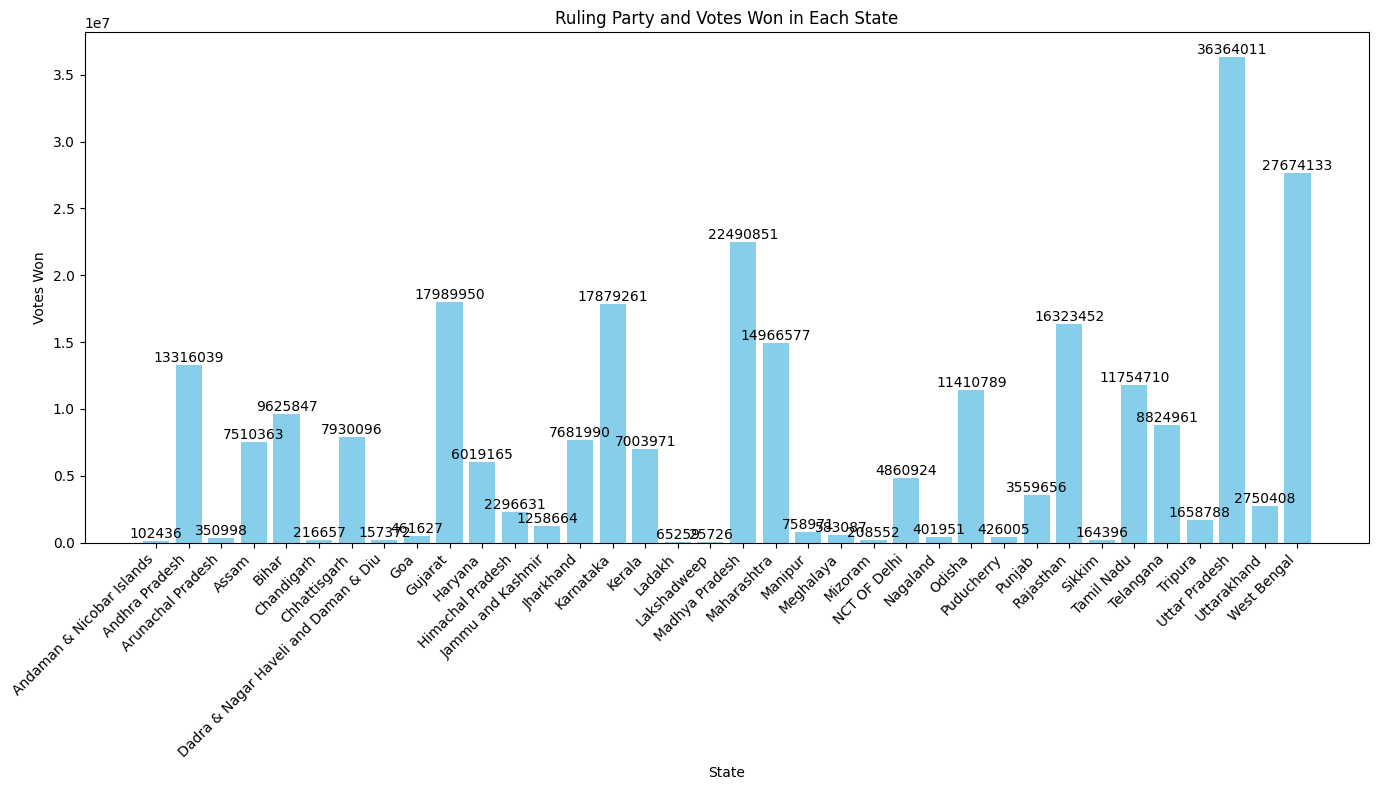

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)
# Ensure the necessary columns are present (adjust as per your dataset)
required_columns = ['State', 'Constituency', 'Party Name', 'Total Votes']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"CSV file must contain the columns: {required_columns}")

# Convert 'Total Votes' column to numeric, handling any formatting issues
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce').fillna(0).astype(int)

# Group by 'State' and 'Party Name' to sum up 'Total Votes'
state_party_votes = df.groupby(['State', 'Party Name'])['Total Votes'].sum().reset_index()

# Find the party with the maximum votes in each state (ruling party)
state_ruling_party = state_party_votes.loc[state_party_votes.groupby('State')['Total Votes'].idxmax()]

# Plotting a single bar graph for all states
plt.figure(figsize=(14, 8))
bars = plt.bar(state_ruling_party['State'], state_ruling_party['Total Votes'], color='skyblue')

# Adding labels and titles
plt.xlabel('State')
plt.ylabel('Votes Won')
plt.title('Ruling Party and Votes Won in Each State')

# Adding text labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

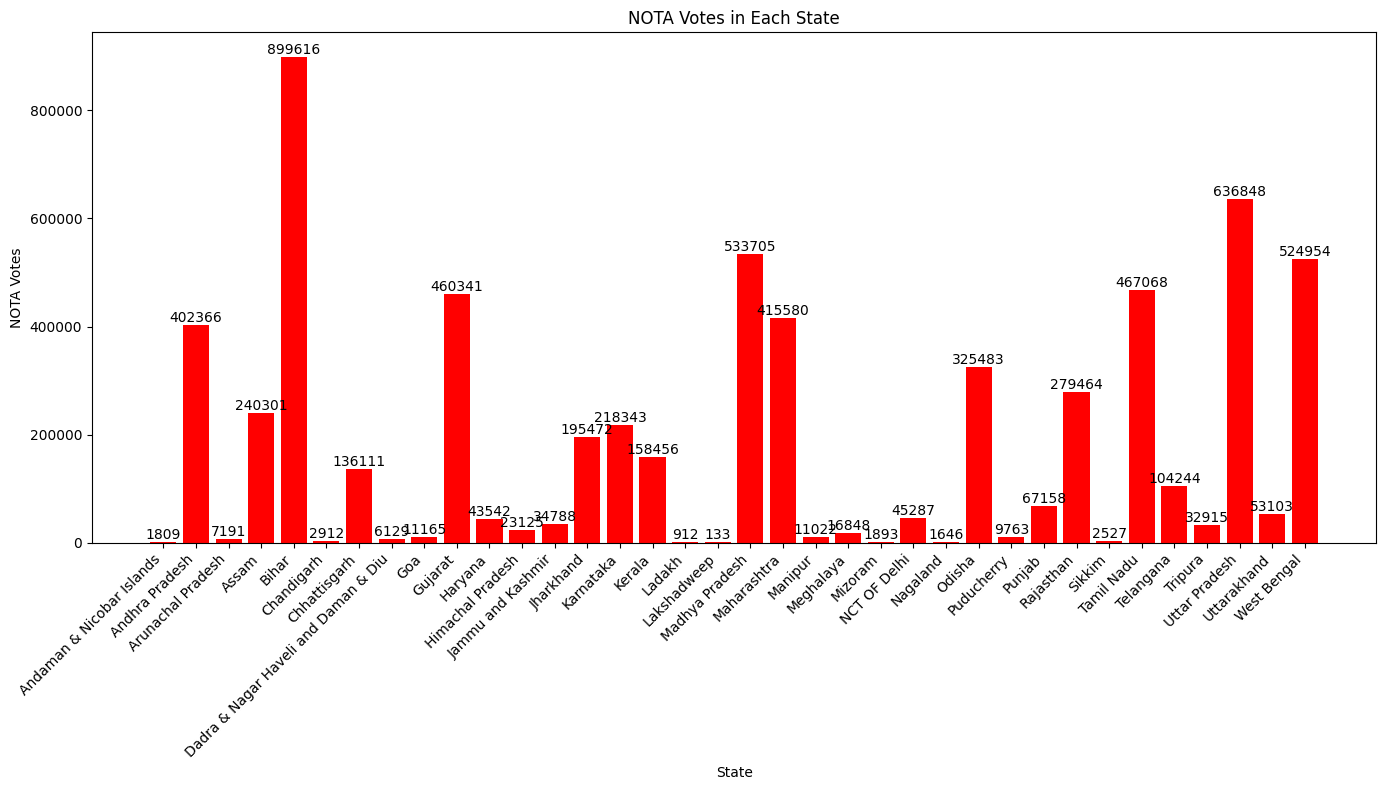

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)
# Ensure the necessary columns are present (adjust as per your dataset)
required_columns = ['State', 'Constituency', 'Candidate Name', 'Total Votes']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"CSV file must contain the columns: {required_columns}")

# Convert 'Total Votes' column to numeric, handling any formatting issues
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce').fillna(0).astype(int)

# Filter rows where 'Candidate Name' contains 'NOTA'
nota_votes = df[df['Candidate Name'].str.contains('NOTA', case=False)]

# Group by 'State' and sum up 'Total Votes' for NOTA
state_nota_votes = nota_votes.groupby('State')['Total Votes'].sum().reset_index()

# Plotting the bar graph for NOTA votes in each state
plt.figure(figsize=(14, 8))
plt.bar(state_nota_votes['State'], state_nota_votes['Total Votes'], color='red')

# Adding labels and titles
plt.xlabel('State')
plt.ylabel('NOTA Votes')
plt.title('NOTA Votes in Each State')

# Adding text labels for each bar
for index, row in state_nota_votes.iterrows():
    plt.text(row['State'], row['Total Votes'], str(row['Total Votes']), ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()